In [8]:
import urllib.request
with urllib.request.urlopen('https://previsaonumerica.cptec.inpe.br/novo/meteograma/bam/sp/santo-andre') as response:
    html = str(response.read())

In [10]:
str(html)

'b\'<!DOCTYPE html>\\n<html lang="pt_BR">\\n<head>\\n\\t<!-- Meta -->\\n\\t<meta charset="utf-8">\\n\\t<meta name="description" content="Centro de Previs\\xc3\\xa3o de Tempo e Estudos Clim\\xc3\\xa1ticos - CPTEC/INPE - Minist\\xc3\\xa9rio da Ci\\xc3\\xaancia e Tecnologia - Brasil um pa\\xc3\\xads de todos">\\n\\t<meta name="keywords" content="previs\\xc3\\xa3o num\\xc3\\xa9rica, cptec, inpe, clim\\xc3\\xa1tica, previs\\xc3\\xa3o clim\\xc3\\xa1tica, desenvolvimento, tempo, clima, previs\\xc3\\xa3o, chuva, sol, satelite, imagens de sat\\xc3\\xa9lite, tempo em s\\xc3\\xa3o paulo, tempo no rio de janeiro, tempo para o sudeste, alerta, meteorologia, clima em s\\xc3\\xa3o paulo, clima no rio de janeiro, clima para o sudeste, meio ambiente, previs\\xc3\\xa3o no meu site, clima no meu site, widget, selos,ondas, praias, mar\\xc3\\xa9, fases da lua, nascer do sol, p\\xc3\\xb4r do sol, energia, agricultura, agroneg\\xc3\\xb3cio, mudan\\xc3\\xa7as clim\\xc3\\xa1ticas, amaz\\xc3\\xb4nia, vale do pa

In [83]:
import re

raw_string = {}
raw_string['precipitacao'] = re.search(r'"ident":\"precipitacao\",\"data\"\:(.*?),"uni', html).group(1)
raw_string['precipitacao_acc'] = re.search(r'\"precipitacao\-acumulada\",\"data\"\:(.*?),"uni', html).group(1)
raw_string['temperatura'] = re.search(r'\"ident\":\"temperatura\",\"data\":(.*?),"uni', html).group(1)
raw_string['temperatura_aparente'] = re.search(r'\"ident\"\:\"temperatura-aparente\",\"data\":(.*?),"uni', html).group(1)
raw_string['umidade_relativa'] = re.search(r'\"umidade\-relativa\",\"data\"\:(.*?),"uni', html).group(1)
raw_string['pressao'] = re.search(r'\"ident\":\"pressao\-ao\-nivel\-do\-mar\",\"data\":(.*?),"uni', html).group(1)

In [84]:
import json
from datetime import datetime 

def extract_data(source_string: str):
    res = json.loads(source_string)
    x_data = [point['x']for point in res]
    x_data_t = [datetime.fromtimestamp(t//1000) for t in x_data]
    y_data = [point['y']for point in res]
    
    return x_data, x_data_t, y_data

In [85]:
keys = list(raw_string.keys())

x_data, x_data_t, y_data = {}, {}, {}

for k in keys:
    print(k)
    x_data[k], x_data_t[k], y_data[k] = extract_data(raw_string[k])

precipitacao
precipitacao_acc
temperatura
temperatura_aparente
umidade_relativa
pressao


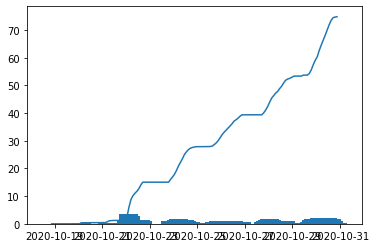

In [68]:
import matplotlib.pyplot as plt

plt.plot(x_data_t['precipitacao_acc'], y_data['precipitacao_acc'])
plt.bar(x_data_t['precipitacao'], y_data['precipitacao'])
plt.show()

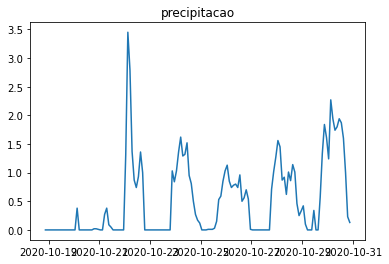

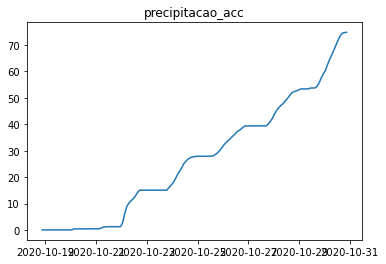

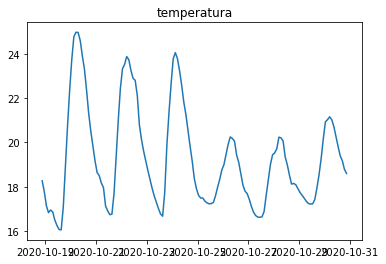

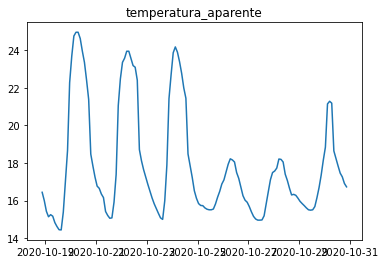

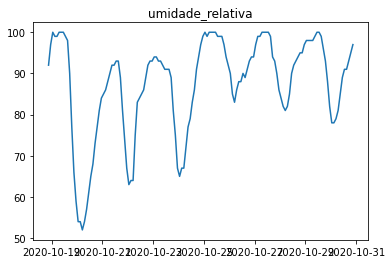

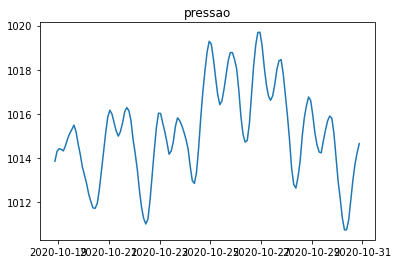

In [89]:
for k in keys:
    plt.figure()
    plt.title(k)
    plt.plot(x_data_t[k], y_data[k])